In [32]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

df = pd.read_csv("cleaned_data.csv")

In [33]:
df

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,Sodium,Water,Vitamin A,Vitamin B1,Vitamin B11,Vitamin B12,Vitamin B2,Vitamin B3,Vitamin B5,Vitamin B6,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density
0,cream cheese,51,5.000,2.900,1.300,0.200,0.8,0.500,0.900,0.000,14.6,0.016,7.6,0.200,0.033,0.064,0.092,0.097,0.084,0.052,0.096,0.004,0.000,0.000,0.100,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070
1,neufchatel cheese,215,19.400,10.900,4.900,0.800,3.1,2.700,7.800,0.000,62.9,0.300,53.6,0.200,0.099,0.079,0.090,0.100,0.200,0.500,0.078,0.000,0.000,0.300,0.045,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100
2,requeijao cremoso light catupiry,49,3.600,2.300,0.900,0.000,0.9,3.400,0.800,0.100,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400
3,ricotta cheese,30,2.000,1.300,0.500,0.002,1.5,0.091,1.500,0.000,9.8,0.017,14.7,0.075,0.019,0.079,0.091,0.027,0.041,0.016,0.007,0.006,0.000,0.001,0.011,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196
4,cream cheese low fat,30,2.300,1.400,0.600,0.042,1.2,0.900,1.200,0.000,8.1,0.046,10.0,0.016,0.080,0.062,0.049,0.026,0.080,0.100,0.003,0.000,0.036,0.009,0.019,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,jews ear,25,0.095,0.000,0.000,0.000,6.7,0.000,0.500,0.000,0.0,0.027,91.7,0.000,0.002,0.009,0.000,0.200,0.012,2.000,0.082,0.600,0.000,0.000,0.000,15.800,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249
2391,enoki mushrooms,1,0.099,0.027,0.000,0.010,0.2,0.034,0.062,0.089,0.0,0.084,2.7,0.000,0.000,0.087,0.031,0.000,0.021,0.200,0.000,0.095,0.000,0.072,0.088,0.000,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433
2392,morel mushrooms,4,0.070,0.056,0.031,0.007,0.7,0.096,0.400,0.400,0.0,0.080,11.6,0.000,0.000,0.062,0.074,0.000,0.008,0.300,0.028,0.055,0.000,0.005,0.000,0.000,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727
2393,portabella mushrooms raw,19,0.300,0.036,0.016,0.100,3.3,2.200,1.800,1.100,0.0,0.014,79.8,0.000,0.064,0.075,0.060,0.100,3.900,1.000,0.100,0.000,0.080,0.049,0.000,2.600,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400


In [34]:
print(df.columns)

Index(['food', 'Caloric Value', 'Fat', 'Saturated Fats',
       'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates',
       'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water',
       'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2',
       'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D',
       'Vitamin E', 'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium',
       'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Zinc',
       'Nutrition Density'],
      dtype='object')


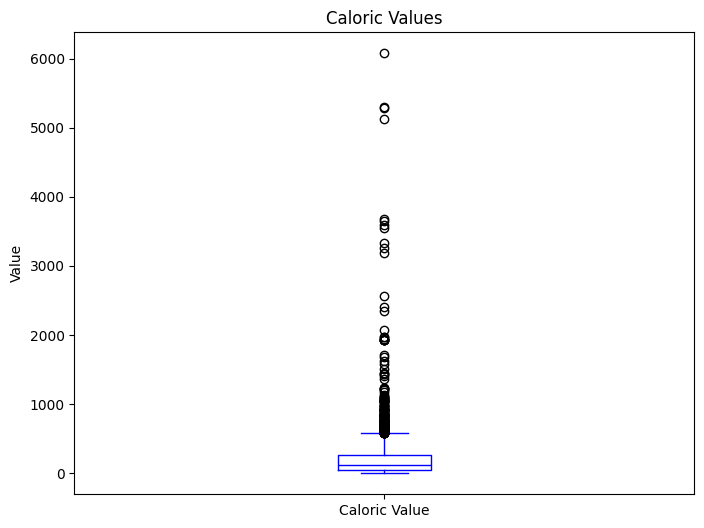

223.7695198329854


In [35]:
df.boxplot(column=['Caloric Value'], grid=False, figsize=(8, 6), color='blue')

plt.title("Caloric Values")
plt.ylabel("Value")
plt.show()

# Calculate the average Happiness Score by Region
calory_avg = df["Caloric Value"].mean()
print(calory_avg)

In [36]:
# Function to determine nutrient level
def nutrient_category(value, low, high):
    if value < low:
        return "Low"
    elif value > high:
        return "High"
    else:
        return "Moderate"

In [37]:
thresholds = {
    "Caloric Value": {"Low": 300, "High": 500},  # Calories per serving
    "Fat": {"Low": 3, "High": 15},  # Grams of fat
    "Sugars": {"Low": 5, "High": 15},  # Grams
    "Protein": {"Low": 10, "High": 20},  # Grams
    "Dietary Fiber": {"Low": 3, "High": 5},  # Grams
    "Cholesterol": {"Low": 20, "High": 75},  # Milligrams
    "Iron": {"Low": 2, "High": 5},  # Milligrams
    "Nutrition Density": {"Low": 30, "High": 70}  # Percentage
}

# Automate adding level columns
columns_to_process = list(df.columns)  # Capture original columns
for col in columns_to_process:
    if col in thresholds:
        low, high = thresholds[col]["Low"], thresholds[col]["High"]
        new_col = f"{col}_Level"  # Name for the new column
        df[new_col] = df[col].apply(lambda x: nutrient_category(x, low, high))


In [38]:
pd.set_option("display.max_rows", 10)
pd.set_option("display.max_columns", 100)

In [39]:
df

,food,Caloric Value,Fat,Saturated Fats,Monounsaturated Fats,Polyunsaturated Fats,Carbohydrates,Sugars,Protein,Dietary Fiber,Cholesterol,Sodium,Water,Vitamin A,Vitamin B1,Vitamin B11,Vitamin B12,Vitamin B2,Vitamin B3,Vitamin B5,Vitamin B6,Vitamin C,Vitamin D,Vitamin E,Vitamin K,Calcium,Copper,Iron,Magnesium,Manganese,Phosphorus,Potassium,Selenium,Zinc,Nutrition Density,Caloric Value_Level,Fat_Level,Sugars_Level,Protein_Level,Dietary Fiber_Level,Cholesterol_Level,Iron_Level,Nutrition Density_Level
0,cream cheese,51,5.000,2.900,1.300,0.200,0.8,0.500,0.900,0.000,14.6,0.016,7.6,0.200,0.033,0.064,0.092,0.097,0.084,0.052,0.096,0.004,0.000,0.000,0.100,0.008,14.100,0.082,0.027,1.300,0.091,15.5,19.100,0.039,7.070,Low,Moderate,Low,Low,Low,Low,Low,Low
1,neufchatel cheese,215,19.400,10.900,4.900,0.800,3.1,2.700,7.800,0.000,62.9,0.300,53.6,0.200,0.099,0.079,0.090,0.100,0.200,0.500,0.078,0.000,0.000,0.300,0.045,99.500,0.034,0.100,8.500,0.088,117.300,129.2,0.054,0.700,130.100,Low,High,Low,Low,Low,Moderate,Low,High
2,requeijao cremoso light catupiry,49,3.600,2.300,0.900,0.000,0.9,3.400,0.800,0.100,0.0,0.000,0.0,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.0,0.000,0.000,5.400,Low,Moderate,Low,Low,Low,Low,Low,Low
3,ricotta cheese,30,2.000,1.300,0.500,0.002,1.5,0.091,1.500,0.000,9.8,0.017,14.7,0.075,0.019,0.079,0.091,0.027,0.041,0.016,0.007,0.006,0.000,0.001,0.011,0.097,41.200,0.097,0.096,4.000,0.024,30.8,43.800,0.035,5.196,Low,Low,Low,Low,Low,Low,Low,Low
4,cream cheese low fat,30,2.300,1.400,0.600,0.042,1.2,0.900,1.200,0.000,8.1,0.046,10.0,0.016,0.080,0.062,0.049,0.026,0.080,0.100,0.003,0.000,0.036,0.009,0.019,22.200,0.072,0.008,1.200,0.098,22.800,37.1,0.034,0.053,27.007,Low,Low,Low,Low,Low,Low,Low,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2390,jews ear,25,0.095,0.000,0.000,0.000,6.7,0.000,0.500,0.000,0.0,0.027,91.7,0.000,0.002,0.009,0.000,0.200,0.012,2.000,0.082,0.600,0.000,0.000,0.000,15.800,0.400,0.600,24.800,0.040,13.900,42.6,0.034,0.700,24.249,Low,Low,Low,Low,Low,Low,Low,Low
2391,enoki mushrooms,1,0.099,0.027,0.000,0.010,0.2,0.034,0.062,0.089,0.0,0.084,2.7,0.000,0.000,0.087,0.031,0.000,0.021,0.200,0.000,0.095,0.000,0.072,0.088,0.000,0.000,0.099,0.034,0.500,0.015,3.2,10.800,0.096,0.433,Low,Low,Low,Low,Low,Low,Low,Low
2392,morel mushrooms,4,0.070,0.056,0.031,0.007,0.7,0.096,0.400,0.400,0.0,0.080,11.6,0.000,0.000,0.062,0.074,0.000,0.008,0.300,0.028,0.055,0.000,0.005,0.000,0.000,5.500,0.056,1.600,2.500,0.060,25.0,53.000,0.069,1.727,Low,Low,Low,Low,Low,Low,Low,Low
2393,portabella mushrooms raw,19,0.300,0.036,0.016,0.100,3.3,2.200,1.800,1.100,0.0,0.014,79.8,0.000,0.064,0.075,0.060,0.100,3.900,1.000,0.100,0.000,0.080,0.049,0.000,2.600,0.200,0.300,0.000,0.092,92.900,313.0,0.015,0.500,9.400,Low,Low,Low,Low,Low,Low,Low,Low


In [41]:
row_count = len(df.loc[df["Fat_Level"] == "Moderate"])
print(row_count)

700


In [42]:
print(df.columns)

Index(['food', 'Caloric Value', 'Fat', 'Saturated Fats',
       'Monounsaturated Fats', 'Polyunsaturated Fats', 'Carbohydrates',
       'Sugars', 'Protein', 'Dietary Fiber', 'Cholesterol', 'Sodium', 'Water',
       'Vitamin A', 'Vitamin B1', 'Vitamin B11', 'Vitamin B12', 'Vitamin B2',
       'Vitamin B3', 'Vitamin B5', 'Vitamin B6', 'Vitamin C', 'Vitamin D',
       'Vitamin E', 'Vitamin K', 'Calcium', 'Copper', 'Iron', 'Magnesium',
       'Manganese', 'Phosphorus', 'Potassium', 'Selenium', 'Zinc',
       'Nutrition Density', 'Caloric Value_Level', 'Fat_Level', 'Sugars_Level',
       'Protein_Level', 'Dietary Fiber_Level', 'Cholesterol_Level',
       'Iron_Level', 'Nutrition Density_Level'],
      dtype='object')


In [43]:
print(df["Dietary Fiber"].max())

76.5


In [44]:
df.to_csv("final_dataset.csv", index=False)